# Installation

If you're starting from scratch, install Anaconda.  Then in a python window or in a notebook, do this:

In [ ]:
pip install gym

# Make something move

This will start up an environment, and make it make random moves for 500 steps.

In [28]:
# 1. It renders instance for 500 timesteps, perform random actions
import gym
env = gym.make('Acrobot-v1')
env.reset()
for _ in range(5000):
    env.render()
    env.step(env.action_space.sample())

KeyboardInterrupt: 

When the system creates the environment window, it might appear behind other windows depending on what you have happening on your machine.  You might have to hunt around for the window a bit when it appears.

The window will sort of lock up when it's done processing. That's because the python kernel isn't paying attention to that window.  It's waiting for you to give it more instructions in the notebook.

You can dismiss the environment window with this command:

In [29]:
env.close()

[ ] Come back and look at what's inside these wariables and concepts: action, step, state, reward, observation

# Environment 2

True

In [37]:
import gym
env = gym.make('MountainCarContinuous-v0') # try for different environements
observation = env.reset()
for t in range(100):
        env.render()
        #print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        #print(observation, reward, done, info)
        if done:
            print("Finished after {} timesteps".format(t+1))
            break

In [38]:
env.close()

Let's take it apart and look at what's inside.  Let's do the steps in the first part of the loop.

In [16]:
env = gym.make('MountainCarContinuous-v0') # try for different environements
observation = env.reset()
env.render()

True

Now we see a cart and a hill rendered.  What can our agent see?

In [17]:
observation

array([-0.45508828,  0.        ])

What can our agent do?

In [18]:
env.action_space

Box(1,)

The type Box represents an N-dimensional array.  So our action_space is a one dimensional array.

In [34]:
env.observation_space

Box(2,)

In [35]:
env.observation_space.high

array([0.6 , 0.07], dtype=float32)

In [36]:
env.observation_space.low

array([-1.2 , -0.07], dtype=float32)

In [40]:
env.observation_space.sample()

array([-0.22391178, -0.0516224 ], dtype=float32)

In [41]:
for i in range(5):
    print(env.observation_space.sample())

[ 0.04051457 -0.04468312]
[-0.29099926 -0.0574033 ]
[0.5457602  0.03963268]
[-0.06539474  0.04389193]
[-0.32122013  0.01429354]


The upper and lower limits are in action_space.high and action_space.low:

In [42]:
env.action_space.high

array([1.], dtype=float32)

In [43]:
env.action_space.low

array([-1.], dtype=float32)

You can automatically select from the range of possible actions like this:

In [44]:
for i in range(5):
    print(env.action_space.sample())

[-0.9504118]
[0.07857756]
[0.5899781]
[-0.6058168]
[0.9120035]


# The basics

The idea behind OpenAI gym is to make agents that can learn how to succeed in their environment.  The basic interaction model is like this:

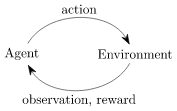


We've got an agent which can take some action.  Once they take that action that leads to a new environment (or a new state of the environment).  The agent can then see what rewards if any came from that action, and can make a new observation of how the revised environment looks.  Then the cycle repeats and the agent takes a new action.

Let's look at this more closely and do it with some code.

In [39]:
import gym
env = gym.make('CartPole-v0')
env.reset()
env.render()

True

That renders an environment in a window that looks something like this:

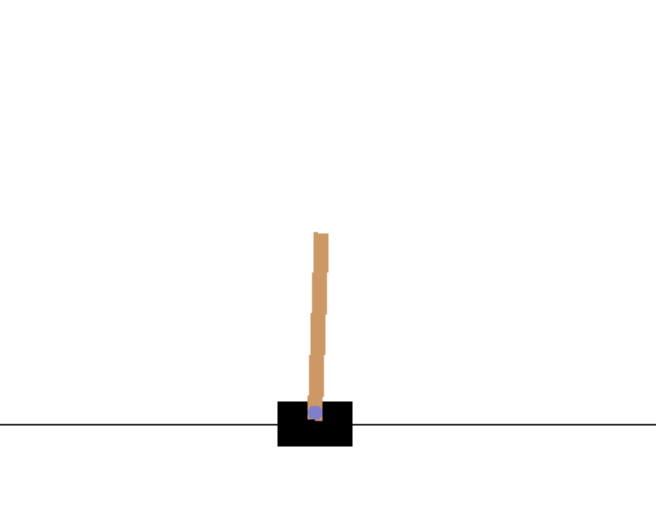

The env.reset() we saw above actually returns an initial observation of the environment.  Let's reset it again and look at our observation.

In [40]:
observation = env.reset()

In [41]:
observation

array([ 0.00713561, -0.02476458,  0.00956328,  0.00449157])

So our observation of our environment is represented by 4 numbers.  We can examine the range of possible values for the observation with observation_space:

In [30]:
env.observation_space

Box(4,)

Box(4,) means that our observation space is a 4-dimensional box.  This just means it's an array of 4 numbers.  You can see the limits of that space:

In [31]:
print(env.observation_space.high)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [33]:
print(env.observation_space.low)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


So what might these 4 numbers represent?  Thinking about what our environment looks like, here I things I imagine would be important:
 * lateral position
 * lateral speed
 * arm angle
 * arm angular speed

I haven't thought of other things that I might need to solve this problem, so I bet that's what those 4 numbers represent (but in some unknown order).

In [11]:
env.action_space

Discrete(2)

The Discrete(2) means there are two possible actions we can take here.  The type Discrete means it's a fixed range of non-negative numbers.  So Discrete(2) means all the numbers from 0 to 2 exclusive.  That means 0 or 1.  You can take a random sample from an action space with sample():

In [24]:
env.action_space.sample()

0

In [26]:
for _ in range(10):
    print(env.action_space.sample())

0
0
1
0
1
0
0
1
1
1


I imagine those two actions correspond to "thrust left" and "thrust right" (but I'm not sure whether left is the first one or second one).

You can also check whether a particular value is within a space, like this:

In [42]:
env.action_space.contains(1)

True

In [43]:
env.action_space.contains(0)

True

In [44]:
env.action_space.contains(3)

False

In [45]:
env.action_space.contains(0.5)

False

In [2]:
import gym
env = gym.make('LunarLander-v2')
env.reset()
env.render()

AttributeError: module 'gym.envs.box2d' has no attribute 'LunarLander'

In [57]:
pip install box2d-py

  Using cached https://files.pythonhosted.org/packages/98/c2/ab05b5329dc4416b5ee5530f0625a79c394a3e3c10abe0812b9345256451/box2d-py-2.3.8.tar.gz
  Running setup.py clean for box2d-py
Failed to build box2d-py
  Running setup.py install for box2d-py: started
    Running setup.py install for box2d-py: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Complete output from command 'd:\prg\Anaconda3\python.exe' -u -c 'import setuptools, tokenize;__file__='"'"'C:\\Users\\RICHAR~1\\AppData\\Local\\Temp\\pip-install-ug2w2rzv\\box2d-py\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\RICHAR~1\AppData\Local\Temp\pip-wheel-a2iaygkk' --python-tag cp37:
  ERROR: Using setuptools (version 41.0.1).
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\Box2D
  copying library\Box2D\Box2D.py -> build\lib.win-amd64-3.7\Box2D
  copying library\Box2D\__init__.py -> build\lib.win-amd64-3.7\Box2D
  creating build\lib.win-amd64-3.7\Box2D\b2
  copying library\Box2D\b2\__init__.py -> build\lib.win-amd64-3.7\Box2D\b2
  running build_ext
  building 'Box2D._Box2D' extension
  swigging Box2D\Box2D.i to Box2D\Box